### Domina Python: Visualización de datos con Matplotlib y Seaborn
#### Gráfico de líneas con Matplotlib

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel('FAC_Febrero2024.xlsx', engine='openpyxl')
data.head()

,Sector,Comprobante,Tipo_Comprobante,Numero_Comprobante,Nombre,Sector_OR,Tipo_Documento,Numero_Documento,Neto_Gravado,Exento,...,Fecha,IdOR,IdVale,MO_s_Iva,MO3_s_Iva,Descuento,REP_s_Iva,REP_Costo_s_Iva,Usuario.1,Unidad_Negocio
0,REPUESTOS,FACTURA,A,0030-00010742,ADASA ACCESORIOS DEL AUTOMOTOR SACIF,Mayorista,CUIT,30542219560,9.719741e+05,0,...,15/02/2024 02:24:00 p.m.,49365,0,0.0000,0.0,-199079.0321,1171053.13,878289.85,Jonatan Ezequiel Monsalvo,Repuestos
1,REPUESTOS,FACTURA,A,0030-00010801,AUTO REPARACIONES NORTE SA,Mayorista,CUIT,30710149085,1.914736e+06,0,...,29/02/2024 02:10:00 p.m.,49292,0,0.0000,0.0,-392174.8700,2306911.00,1730183.25,Jonatan Ezequiel Monsalvo,Repuestos
2,REPUESTOS,FACTURA,A,0030-00010780,DAJA SERVICIOS S.R.L.,Mayorista,CUIT,30711904553,6.595041e+05,0,...,23/02/2024 03:28:00 p.m.,49488,0,63312.5761,0.0,0.0000,596191.55,436843.41,Jonatan Ezequiel Monsalvo,Repuestos
3,REPUESTOS,FACTURA,A,0030-00010799,DAJA SERVICIOS S.R.L.,Mayorista,CUIT,30711904553,1.162810e+06,0,...,29/02/2024 01:47:00 p.m.,49571,0,0.0000,0.0,-95666.5083,1258476.43,910239.58,Jonatan Ezequiel Monsalvo,Repuestos
4,REPUESTOS,FACTURA,A,0030-00010726,FECHINO JOSE LUIS Y PUYOL EDUARDO ESTEBAN S.H.,Mayorista,CUIT,30710615825,2.563914e+06,0,...,09/02/2024 04:04:00 p.m.,49323,0,0.0000,0.0,-519304.4008,3083218.22,2250387.19,Jonatan Ezequiel Monsalvo,Repuestos


In [4]:
data['Mes'] = pd.to_datetime(data['Mes'])
data.info()

KeyError: 'Mes'

In [5]:
data.columns

Index(['Sector', 'Comprobante', 'Tipo_Comprobante', 'Numero_Comprobante',
       'Nombre', 'Sector_OR', 'Tipo_Documento', 'Numero_Documento',
       'Neto_Gravado', 'Exento', 'Iva', 'Iva_Utilitario', 'Total ', 'Usuario',
       'Fecha', 'IdOR', 'IdVale', 'MO_s_Iva', 'MO3_s_Iva', 'Descuento',
       'REP_s_Iva', 'REP_Costo_s_Iva', 'Usuario.1', 'Unidad_Negocio'],
      dtype='object')

In [6]:
data.isnull().sum()

Sector                0
Comprobante           0
Tipo_Comprobante      0
Numero_Comprobante    0
Nombre                0
Sector_OR             0
Tipo_Documento        0
Numero_Documento      0
Neto_Gravado          0
Exento                0
Iva                   0
Iva_Utilitario        0
Total                 0
Usuario               0
Fecha                 0
IdOR                  0
IdVale                0
MO_s_Iva              0
MO3_s_Iva             0
Descuento             0
REP_s_Iva             0
REP_Costo_s_Iva       0
Usuario.1             0
Unidad_Negocio        0
dtype: int64

In [8]:
# Forzar a string
data["Fecha_limpia"] = data["Fecha"].astype(str)

# Reemplazar sufijos en español
data["Fecha_limpia"] = (
    data["Fecha_limpia"]
    .str.replace("a.m.", "AM", regex=False)
    .str.replace("p.m.", "PM", regex=False)
)

In [9]:
# Convertir a datetime
data["Fecha_limpia"] = pd.to_datetime(
    data["Fecha_limpia"], 
    format="%d/%m/%Y %I:%M:%S %p", 
    errors="coerce"
)

In [10]:
# Extraer solo la fecha
data["Fecha_sola"] = data["Fecha_limpia"].dt.date

# Extraer solo la hora
data["Hora_sola"] = data["Fecha_limpia"].dt.time

# Año, mes y día por separado
data["Año"] = data["Fecha_limpia"].dt.year
data["Mes"] = data["Fecha_limpia"].dt.month
data["Día"] = data["Fecha_limpia"].dt.day



In [11]:
data.head()

,Sector,Comprobante,Tipo_Comprobante,Numero_Comprobante,Nombre,Sector_OR,Tipo_Documento,Numero_Documento,Neto_Gravado,Exento,...,REP_s_Iva,REP_Costo_s_Iva,Usuario.1,Unidad_Negocio,Fecha_limpia,Fecha_sola,Hora_sola,Año,Mes,Día
0,REPUESTOS,FACTURA,A,0030-00010742,ADASA ACCESORIOS DEL AUTOMOTOR SACIF,Mayorista,CUIT,30542219560,9.719741e+05,0,...,1171053.13,878289.85,Jonatan Ezequiel Monsalvo,Repuestos,2024-02-15 14:24:00,2024-02-15,14:24:00,2024,2,15
1,REPUESTOS,FACTURA,A,0030-00010801,AUTO REPARACIONES NORTE SA,Mayorista,CUIT,30710149085,1.914736e+06,0,...,2306911.00,1730183.25,Jonatan Ezequiel Monsalvo,Repuestos,2024-02-29 14:10:00,2024-02-29,14:10:00,2024,2,29
2,REPUESTOS,FACTURA,A,0030-00010780,DAJA SERVICIOS S.R.L.,Mayorista,CUIT,30711904553,6.595041e+05,0,...,596191.55,436843.41,Jonatan Ezequiel Monsalvo,Repuestos,2024-02-23 15:28:00,2024-02-23,15:28:00,2024,2,23
3,REPUESTOS,FACTURA,A,0030-00010799,DAJA SERVICIOS S.R.L.,Mayorista,CUIT,30711904553,1.162810e+06,0,...,1258476.43,910239.58,Jonatan Ezequiel Monsalvo,Repuestos,2024-02-29 13:47:00,2024-02-29,13:47:00,2024,2,29
4,REPUESTOS,FACTURA,A,0030-00010726,FECHINO JOSE LUIS Y PUYOL EDUARDO ESTEBAN S.H.,Mayorista,CUIT,30710615825,2.563914e+06,0,...,3083218.22,2250387.19,Jonatan Ezequiel Monsalvo,Repuestos,2024-02-09 16:04:00,2024-02-09,16:04:00,2024,2,9


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Sector              233 non-null    object        
 1   Comprobante         233 non-null    object        
 2   Tipo_Comprobante    233 non-null    object        
 3   Numero_Comprobante  233 non-null    object        
 4   Nombre              233 non-null    object        
 5   Sector_OR           233 non-null    object        
 6   Tipo_Documento      233 non-null    object        
 7   Numero_Documento    233 non-null    int64         
 8   Neto_Gravado        233 non-null    float64       
 9   Exento              233 non-null    int64         
 10  Iva                 233 non-null    float64       
 11  Iva_Utilitario      233 non-null    int64         
 12  Total               233 non-null    float64       
 13  Usuario             233 non-null    object        

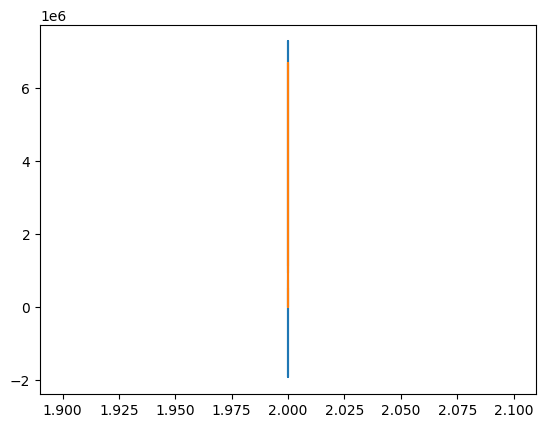

In [13]:
### Gráfico de lineas

fig, ax = plt.subplots()
ax.plot(data['Mes'], data['Neto_Gravado'])
ax.plot(data['Mes'], data['REP_s_Iva'])
plt.show()

In [128]:
df_ventas = pd.DataFrame({
    'Mes': ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio','Julio'],
    'Ventas': [1500, 1800, 1700, 1600, 2000, 2100, 2200],
    'Gastos': [800, 900, 850, 870, 950, 1000, 1200]  
})

df_ventas['Ganancia'] = df_ventas['Ventas']-df_ventas['Gastos']

df_ventas.head(10)

,Mes,Ventas,Gastos,Ganancia
0,Enero,1500,800,700
1,Febrero,1800,900,900
2,Marzo,1700,850,850
3,Abril,1600,870,730
4,Mayo,2000,950,1050
5,Junio,2100,1000,1100
6,Julio,2200,1200,1000


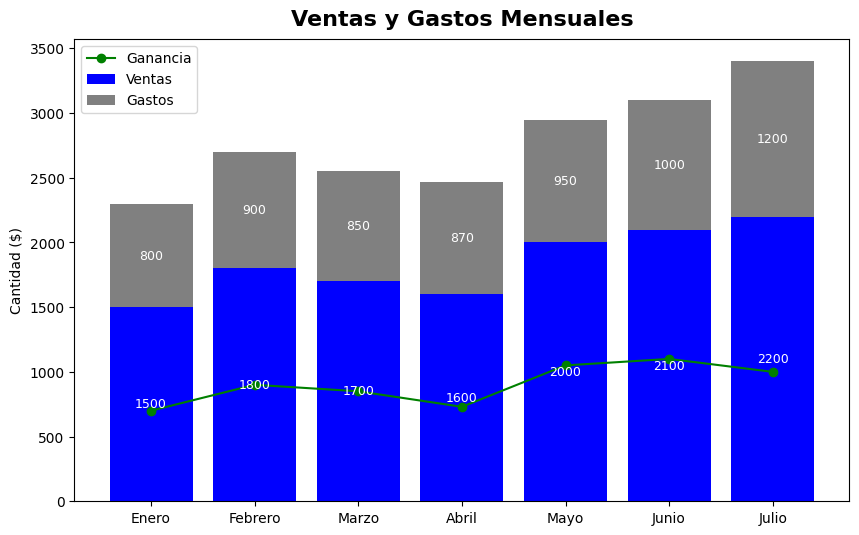

In [131]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(df_ventas['Mes'], df_ventas['Ventas'], label='Ventas', color='blue')
ax.bar(df_ventas['Mes'], df_ventas['Gastos'], bottom=df_ventas['Ventas'], label='Gastos', color='gray')
ax.plot(df_ventas['Mes'], df_ventas['Ganancia'], label='Ganancia', color='green', marker='o')

# --- Agregar etiquetas ---
for i, (ventas, gastos) in enumerate(zip(df_ventas['Ventas'], df_ventas['Gastos'])):
    # Etiqueta dentro de ventas
    ax.text(i, ventas/2, str(ventas), ha='center', va='center', color='white', fontsize=9)
    # Etiqueta dentro de gastos (arriba de ventas)
    ax.text(i, ventas + gastos/2, str(gastos), ha='center', va='center', color='white', fontsize=9)

ax.set_ylabel('Cantidad ($)')
plt.title('Ventas y Gastos Mensuales', fontsize=16, color='black', fontweight='bold', pad=10, ha='center')
plt.legend()
plt.show()

###  Visualización de datos Avanzada con Matplotlib y Seaborn

####  Visualización de datos Avanzada con Matplotlib y Seaborn

c:\Users\epere\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\epere\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\epere\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\epere\AppData\Local\Programs\Python\Python313\

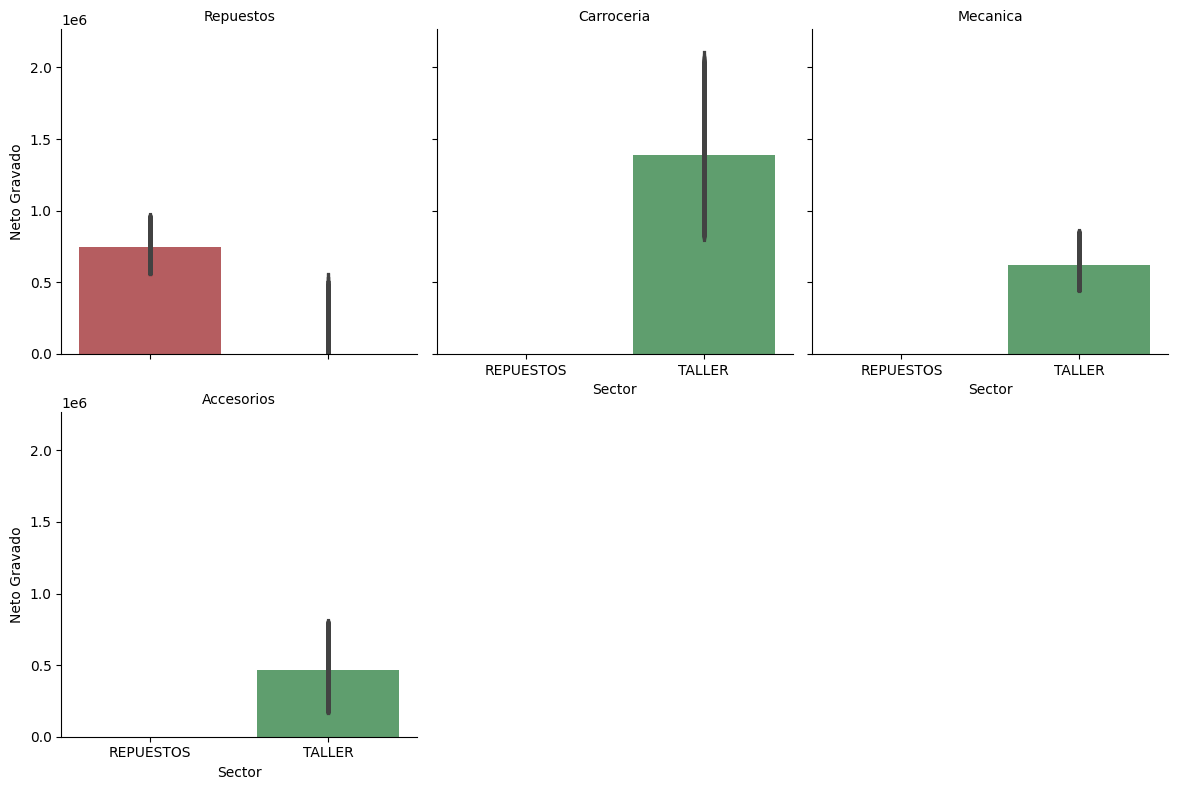

In [16]:
g = sns.FacetGrid(data, col="Unidad_Negocio", col_wrap=3, height=4)
g.map(sns.barplot, "Sector", "Neto_Gravado", order=data["Sector"], palette="deep")
g.set_titles(col_template="{col_name}")
g.set(ylim=(0, None))
g.set(xticks=range(len(data["Sector"].unique())), xticklabels=data["Sector"].unique())
g.set_axis_labels("Sector", "Neto Gravado")
plt.show()

####  Visualización de datos Avanzada con Matplotlib y Seaborn

C:\Users\epere\AppData\Local\Temp\ipykernel_28340\2705881481.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="repuestos", y="ventas", data=df_ventas_2, palette="deep")


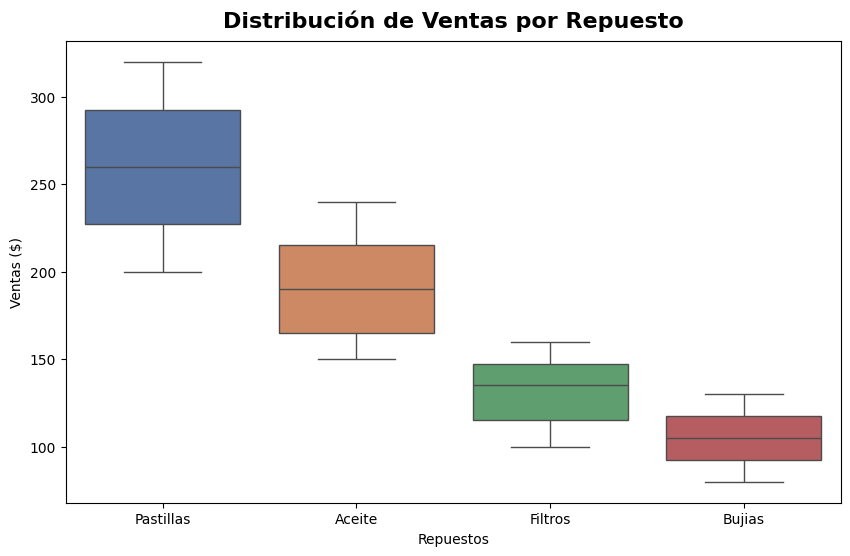

In [19]:
df_ventas_2 = pd.DataFrame({
    "repuestos": ["Pastillas", "Aceite", "Filtros", "Bujias"] * 6,
    "ventas": [200, 150, 100, 80, 220, 160, 110, 90, 250, 180, 130, 100, 270, 200, 140, 110, 300, 220, 150, 120, 320, 240, 160, 130],
})

fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x="repuestos", y="ventas", data=df_ventas_2, palette="deep")
ax.set_xlabel("Repuestos")
ax.set_ylabel("Ventas ($)")
ax.set_title("Distribución de Ventas por Repuesto", fontsize=16, color='black', fontweight='bold', pad=10)
plt.show()

####  Diagrama de violín con Seaborn

C:\Users\epere\AppData\Local\Temp\ipykernel_28340\2234092808.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="repuestos", y="ventas", data=df_ventas_2, palette="muted", inner="quartile", ax=ax)


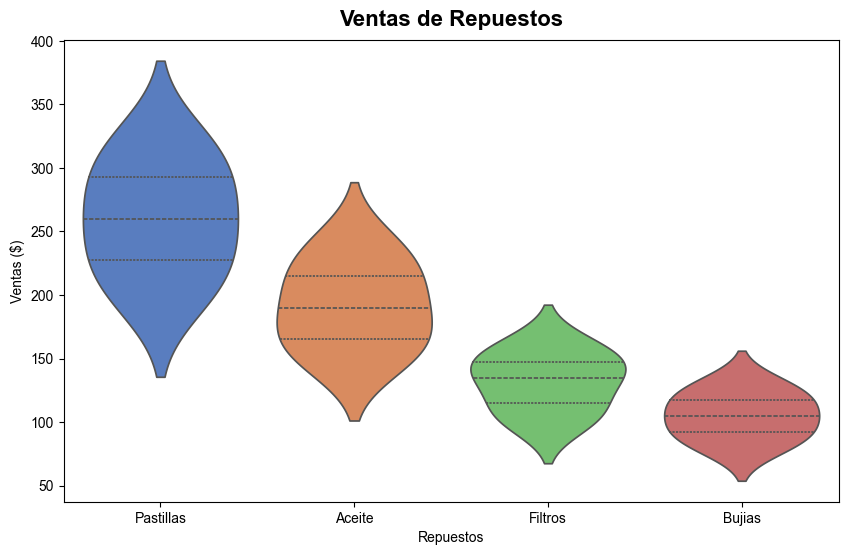

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
sns.set_theme(style="whitegrid")
sns.violinplot(x="repuestos", y="ventas", data=df_ventas_2, palette="muted", inner="quartile", ax=ax)
ax.set_xlabel("Repuestos")
ax.set_ylabel("Ventas ($)")
ax.set_title("Ventas de Repuestos", fontsize=16, color='black', fontweight='bold', pad=10)
plt.show()